In [2]:
import pandas as pd, sqlite3, matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [4]:
days = pd.read_sql('''
                   SELECT uid, CAST(strftime('%u', timestamp) AS INTEGER) day, COUNT(*) count
                   FROM checker
                   WHERE uid LIKE 'user_%'
            ''', conn)

In [5]:
days_tb = days.pivot_table(values='count', index='day', columns='uid', fill_value=0, aggfunc='sum')

In [6]:
days_tb = days_tb.loc[:, days_tb.sum().sort_values(ascending=False).index]

In [7]:
uids = days_tb.columns.values
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

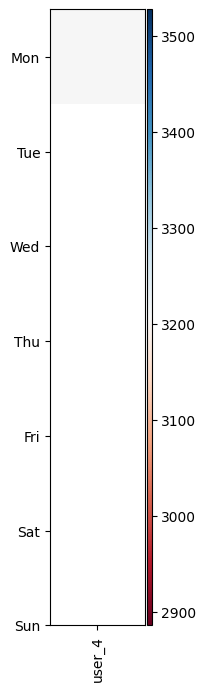

In [10]:
f, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(days_tb, cmap='RdBu', interpolation='nearest')
ax.set_xticks(range(len(uids)), labels=uids, rotation=90)
ax.set_yticks(range(len(days)), labels=days)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', '5%', '2%')
f.colorbar(im, cax);